### Regression

#### Linear Regression

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
# y = theta0 + theta1*x1 + Gaussian noise
y = 4 + 3 * X1 + 4 * X2 + np.random.randn(100, 1)

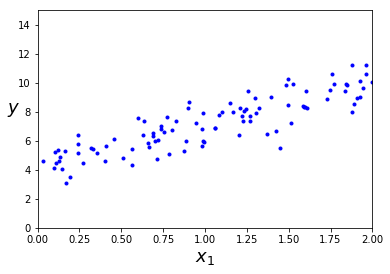

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(np.array([[4.23724134], [2.88453499]]))
y_predict

array([[ 4.23724134],
       [10.00631132]])

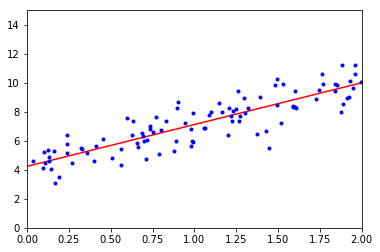

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.23724134]), array([[2.88453499]]))

In [7]:
lin_reg.predict(np.array([[1.75]]))

array([[9.28517758]])

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/Users/jeff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.24703617]), array([2.89130314]))

#### Polynomial Regression

In [12]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X1**2 + X1 + 2 + np.random.randn(m, 1)

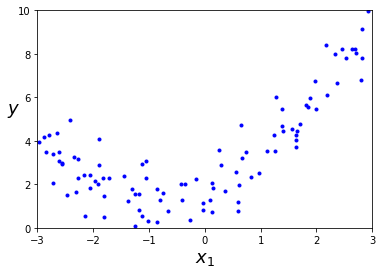

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [15]:
X[0], y[0]

(array([-0.75275929]), array([1.61761105]))

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# y = 0.5 * X**2 + 1 * X + 2 + np.random.randn(m, 1)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

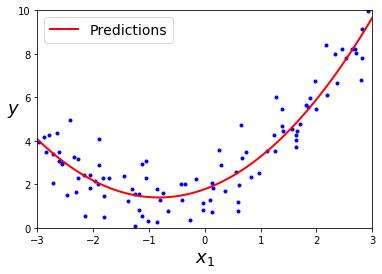

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [22]:
lin_reg.predict(np.array([[2, 4]]))

array([[5.90693421]])

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [24]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82335753]])

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## Boston dataset

In [32]:
from sklearn.datasets import load_boston

boston = load_boston()
features = boston.data[:, 0:2]
# consider all the features: features = boston.data
target = boston.target

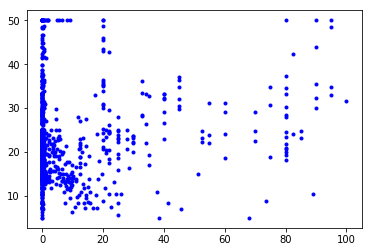

In [33]:
plt.plot(features, target, "b.")
plt.show()

In [34]:
features[0]

array([6.32e-03, 1.80e+01])

In [35]:
lin = LinearRegression()
mod = lin.fit(features, target)

In [36]:
mod.intercept_, mod.coef_

(22.466816921057227, array([-0.34977589,  0.11642402]))